In [19]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#numero de CÓDIGO:2184609 
# Como se obtuvo el valor de X para el ejercicio
codigo = "2184609"
X = sum ([int(i) for i in codigo])
# x = 30
Y=X/3
# Y=10
# Para hallar longitudes de la viga (m)
L1 = (0.05 * X)
#1.5
L2 =(0.05 * X)*1.5
#2.25
L3 = (0.05 * X)*0.5
#0.75
# cargas kN
P = 0.05*X
#1.5
# distribuida kN / m
w = 0.005*X+0.01*Y
#0.25
viga = {  "L1": 1.5,"L2": 2.25, "L3": 0.75, "w": 0.25,"P": 1.5,}

In [21]:
import sympy as sp

In [22]:
Ay, Ma, x = sp.symbols(" Ay Ma x ")

In [23]:
# Equilibrio en y
Equilibrio_y = Ay + viga["P"] - viga["w"] * viga["L1"] / 2 - viga["w"] * ( viga["L3"]) / 2 - viga["w"] * viga["L2"]
Ecuacion_y = sp.Eq(Equilibrio_y, 0)
R_Ay =  sp.solve(Ecuacion_y)[0]
R_Ay

-0.656250000000000

In [24]:
# EQULIBRIO MOMENTOS
Equilibrio_M =  Ma + viga["P"] * (viga["L1"] + viga["L2"] + viga["L3"]) - viga["w"] * viga["L1"] / 2 * (2 * viga["L1"] / 3) - viga["w"] * viga["L2"] * (viga["L1"] + viga["L2"] / 2) - viga["w"] * viga["L3"] / 2 * (viga["L1"] + viga["L2"] +  viga["L3"] / 3)
Ecuacion_M = sp.Eq(Equilibrio_M, 0)
R_Ma =  sp.solve(Ecuacion_M)[0]
# kN - m
R_Ma

-4.71093750000000

In [25]:
# ECUACIONES DE CORTANTE Y MOMENTO 
# PARA EL PRIMER TRAMO
# 0 <= x <= L1
carga_distribuida = viga["w"] * x / viga["L1"]
# - integral carga * dx + V(x)
Vx_1 = R_Ay - sp.integrate(carga_distribuida, x)

Mx_1 = - R_Ma + sp.integrate(Vx_1, x)
Mx_1

-0.0277777777777778*x**3 - 0.65625*x + 4.7109375

In [26]:
# SEGUNDO TRAMO
# 0 <= x <= L2
carga_distribuida = viga["w"]
# - integral carga * dx + V(x)
Vx_2 =  Vx_1.subs(x, viga["L1"]) - sp.integrate(carga_distribuida, x)

Mx_2 = Mx_1.subs(x, viga["L1"]) + sp.integrate(Vx_2, x)
Mx_2

-0.125*x**2 - 0.84375*x + 3.6328125

In [27]:
#  TERCER TRAMO
# 0 <= x <= L3
carga_distribuida = - viga["w"] * x / viga["L3"] +  viga["w"]
# - integral carga * dx + V(x)
Vx_3 = viga["P"] + Vx_2.subs(x, viga["L2"]) - sp.integrate(carga_distribuida, x)

Mx_3 = Mx_2.subs(x, viga["L2"]) + sp.integrate(Vx_3, x)
Mx_3

0.0555555555555556*x**3 - 0.125*x**2 + 0.09375*x + 1.1015625

In [28]:
import numpy as np

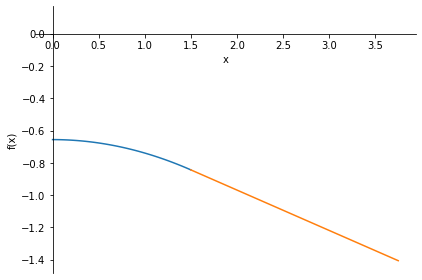

In [29]:
# Diagrama de fuerza cortante
x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.01, 0.01)
# obtener arrays reemplazando la funcion de cada tramo
Tramo1 = sp.lambdify(x, Vx_1)(x_array[x_array <= viga["L1"]])
Tramo2 = sp.lambdify(x, Vx_2)(x_array[(x_array > viga["L1"]) & (x_array <= (viga["L1"] + viga["L2"]))] - viga["L1"])
Tramo3 = sp.lambdify(x, Vx_3)(x_array[x_array > (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

cortante_y = np.concatenate((Tramo1, Tramo2, Tramo3))
sp.plot((Vx_1, (x, 0, viga["L1"])), (Vx_2.subs(x, x - viga["L1"]), (x, viga["L1"], viga["L1"] + viga["L2"])), (Vx_3.subs(x, x - (viga["L1"] + viga["L2"])), (x, (viga["L1"] + viga["L2"]), viga["L1"] + viga["L2"])))

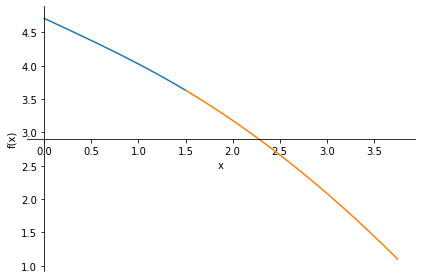

In [30]:
# Diagrama momento flector
x_array = np.arange(0, viga["L1"] + viga["L2"] + viga["L3"] + 0.01, 0.01)
# obtener arrays reemplazando la funcion de cada tramo
Tramo1 = sp.lambdify(x, Mx_1)(x_array[x_array <= viga["L1"]])
Tramo2 = sp.lambdify(x, Mx_2)(x_array[(x_array > viga["L1"]) & (x_array <= (viga["L1"] + viga["L2"]))] - viga["L1"])
Tramo3 = sp.lambdify(x, Mx_3)(x_array[x_array > (viga["L1"] + viga["L2"])] - viga["L1"] - viga["L2"])

M_y = np.concatenate((Tramo1, Tramo2, Tramo3))
sp.plot((Mx_1, (x, 0, viga["L1"])), (Mx_2.subs(x, x - viga["L1"]), (x, viga["L1"], viga["L1"] + viga["L2"])), (Mx_3.subs(x, x - (viga["L1"] + viga["L2"])), (x, (viga["L1"] + viga["L2"]), viga["L1"] + viga["L2"])))

In [31]:
# unidades kN - m
#momento maximo
M_maximo = 0
M_maximo_positivo = np.amax(M_y)
M_maximo_negativo = np.amin(M_y)

if np.abs(M_maximo_negativo) > M_maximo_positivo:
    M_maximo = np.abs(M_maximo_negativo)
else: 
  M_maximo= M_maximo_positivo

M_maximo

4.7109375

In [32]:
# unidad kN 
#cortante maximo
cortante_maximo = 0
cortante_maximo_positivo = np.amax(cortante_y)
cortante_maximo_negativo = np.amin(cortante_y)

if np.abs(cortante_maximo_negativo) > cortante_maximo_positivo:
    cortante_maximo = np.abs(cortante_maximo_negativo)
else: 
   cortante_maximo =cortante_maximo_positivo

cortante_maximo

1.40625